## 4.5. 权重衰减
前一节我们描述了过拟合的问题，本节我们将介绍一些正则化模型的技术。我们总是可以通过去收集更多的训练数据来缓解过拟合。但这可能成本很高，耗时颇多，或者完全超出我们的控制，因而在短期内不可能做到。假设我们已经拥有尽可能多的高质量数据，我们便可以将重点放在正则化技术上。
回想一下，在多项式回归的例子（4.4节）中，**我们可以通过调整拟合多项式的阶数来限制模型的容量**。实际上，限制特征的数量是缓解过拟合的一种常用技术。 然而，简单地丢弃特征对这项工作来说可能过于生硬。我们继续思考多项式回归的例子，考虑高维输入可能发生的情况。多项式对多变量数据的自然扩展称为单项式（monomials）， 也可以说是变量幂的乘积。 单项式的阶数是幂的和。 例如，$x_1^2 x_2$和$x_3 x_5^2$都是3次单项式。

注意，随着阶数$d$的增长，带有阶数$d$的项数迅速增加。给定$k$个变量，阶数为$d$的项的个数为 (${k - 1 + d} \choose {k - 1}$)，即 $C^{k-1}_{k-1+d} = \frac{(k-1+d)!}{(d)!(k-1)!}$ 。因此即使是阶数上的微小变化，比如从2到3，也会显著增加我们模型的复杂性。 仅仅通过简单的限制特征数量（在多项式回归中体现为限制阶数），可能仍然使模型在过简单和过复杂中徘徊， 我们需要一个更细粒度的工具来调整函数的复杂性，使其达到一个合适的平衡位置。 ## 范数与权重衰减

在 2.3.10节中， 我们已经描述了$L_2$范数和$L_1$范数，它们是更为一般的$L_p$范数的特殊情况。

在训练参数化机器学习模型时，**权重衰减（weight decay）是最广泛使用的正则化的技术之一， 它通常也被称为$L_2$正则化**。 这项技术通过函数与零的距离来衡量函数的复杂度， 因为在所有函数$f$中，函数$f = 0$（所有输入都得到值0）在某种意义上是最简单的。但是我们应该如何精确地测量一个函数和零之间的距离呢？没有一个正确的答案。事实上，函数分析和巴拿赫空间理论的研究，都在致力于回答这个问题。

一种简单的方法是通过线性函数$f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}$中的权重向量的某个范数来度量其复杂性，例如
$\| \mathbf{w} \|^2$。 要保证权重向量比较小， **最常用方法是将其范数作为惩罚项加到最小化损失的问题中**。 将原来的训练目标最小化训练标签上的预测损失，调整为最小化预测损失和惩罚项之和。现在，如果我们的权重向量增长的太大，我们的学习算法可能会更集中于最小化权重范数$\| \mathbf{w} \|^2$。 这正是我们想要的。 让我们回顾一下 3.1节中的线性回归例子。 我们的损失由下式给出：
$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.(4.5.1)$$
  
回想一下，$\mathbf{x}^{(i)}$是样本$i$的特征，$y^{(i)}$是样本$i$的标签，$(\mathbf{w}, b)$ 是权重和偏置参数。为了惩罚权重向量的大小， 我们必须以某种方式在损失函数中添加$\| \mathbf{w} \|^2$，但是模型应该如何平衡这个新的额外惩罚的损失？ 实际上，我们通过正则化常数
来描述这种权衡， 这是一个非负超参数，我们使用验证数据拟合：
$$L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2,(4.5.2)$$
 
对于$\lambda = 0$，我们恢复了原来的损失函数。 对于$\lambda > 0$，我们限制$\| \mathbf{w} \|$的大小。 这里我们仍然除以2：当我们取一个二次函数的导数时，2 和 $1/2$会抵消，以确保更新表达式看起来既漂亮又简单。为什么在这里我们使用平方范数而不是标准范数（即欧几里得距离）？ 我们这样做是为了便于计算。 通过平方$L_2$范数，我们去掉平方根，留下权重向量每个分量的平方和。这使得惩罚的导数很容易计算：导数的和等于和的导数。

此外，为什么我们首先使用$L_2$范数，而不是$L_1$范数。 事实上，这个选择在整个统计领域中都是有效的和受欢迎的。 
$L_2$正则化线性模型构成经典的岭回归（ridge regression）算法，$L_1$正则化线性回归是统计学中类似的基本模型，通常被称为套索回归（lasso regression）。 使用$L_2$范数的一个原因是它对权重向量的大分量施加了巨大的惩罚。**这使得我们的学习算法偏向于在大量特征上均匀分布权重的模型**。 在实践中，这可能使它们对单个变量中的观测误差更为稳定。相比之下，$L_1$惩罚会导致模型将权重集中在一小部分特征上， 而将其他权重清除为零。 **这称为特征选择（feature selection），这可能是其他场景下需要的**。

使用与 (3.1.10)中的相同符号，$L_2$正则化回归的小批量随机梯度下降更新如下式：
$$\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}.(4.5.3)$$
 
根据之前章节所讲的，我们根据估计值与观测值之间的差异来更新$\mathbf{w}$。然而，我们同时也在试图将$\mathbf{w}$的大小缩小到零。 **这就是为什么这种方法有时被称为权重衰减**。我们仅考虑惩罚项，优化算法在训练的每一步衰减权重。与特征选择相比，权重衰减为我们提供了一种连续的机制来调整函数的复杂度。 较小的$\lambda$值对应较少约束的$\mathbf{w}$，而较大的$\lambda$值对$\mathbf{w}$的约束更大。

是否对相应的偏置$b^2$进行惩罚在不同的实践中会有所不同，在神经网络的不同层中也会有所不同。通常，网络输出层的偏置项不会被正则化。

### 4.5.1. 高维线性回归
我们通过一个简单的例子来演示权重衰减。

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

首先，我们像以前一样生成一些数据，生成公式如下：
$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.01^2).(4.5.4)$$
 
我们选择标签是关于输入的线性函数。 标签同时被均值为0，标准差为0.01高斯噪声破坏。为了使过拟合的效果更加明显，我们可以将问题的维数增加到200，并使用一个只包含20个样本的小训练集。

In [2]:
n_train,n_test,num_inputs,batch_size = 20,100,200,5
true_w,true_b = torch.ones((num_inputs,1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w,true_b,n_train)
train_iter = d2l.load_array(train_data,batch_size)
test_data = d2l.synthetic_data(true_w,true_b,n_test)
test_iter = d2l.load_array(test_data,batch_size,is_train=False)

### 4.5.2. 从零开始实现
下面我们将从头开始实现权重衰减，只需将$L_2$的平方惩罚添加到原始目标函数中。

#### 4.5.2.1. 初始化模型参数
首先，我们将定义一个函数来随机初始化模型参数。

In [3]:
def init_params():
    w = torch.normal(0,1,size=(num_inputs,1),requires_grad=True)
    b = torch.zeros(1,requires_grad=True)
    return [w ,b]

#### 4.5.2.2. 定义$L_2$范数惩罚
实现这一惩罚最方便的方法是对所有项求平方后并将它们求和。

In [4]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

#### 4.5.2.3. 定义训练代码实现
下面的代码将模型拟合训练数据集，并在测试数据集上进行评估。从3节以来，线性网络和平方损失没有变化，所以我们通过`d2l.linreg`和`d2l.squared_loss`导入它们。 唯一的变化是损失现在包括了惩罚项。

In [9]:
def train(lambd):
    w,b = init_params()
    net,loss = lambda X: d2l.linreg(X,w,b), d2l.squared_loss
    num_epochs, lr = 100,  0.003
    animator = d2l.Animator(xlabel='epochs',ylabel='loss',yscale='log',
                           xlim=[5,num_epochs],legend=['train','test'])
    for epoch in range(num_epochs):
        for X,y in train_iter:
            # 增加L2范数惩罚项
            # 广播机制使L2_penalty(w) 成为一个长度为batch_size的向量
            l = loss(net(X),y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w,b],lr,batch_size)
            if (epoch + 1) % 5 == 0:
                animator.add(epoch + 1,(d2l.evaluate_loss(net,train_iter,loss),
                                        d2l.evaluate_loss(net,test_iter,loss)))
    print('w的L2范数是:', torch.norm(w).item())                

#### 4.5.2.4. 忽略正则化直接训练
我们现在用`lambd = 0`禁用权重衰减后运行这个代码。 注意，这里训练误差有了减少，但测试误差没有减少， 这意味着出现了严重的过拟合。

w的L2范数是: 14.524040222167969


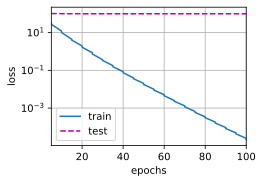

In [10]:
train(lambd = 0)

#### 4.5.2.5. 使用权重衰减
下面，我们使用权重衰减来运行代码。注意，在这里训练误差增大，但测试误差减小。这正是我们期望从正则化中得到的效果。

w的L2范数是: 0.40801572799682617


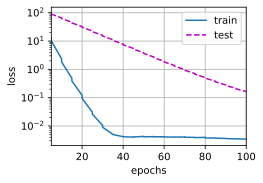

In [22]:
train(lambd = 3)

### 4.5.3 简洁实现
由于权重衰减在神经网络优化中很常用，深度学习框架为了便于我们使用权重衰减，将权重衰减集成到优化算法中，以便与任何损失函数结合使用。此外，这种集成还有计算上的好处，允许在不增加任何额外的计算开销的情况下向算法中添加权重衰减。由于更新的权重衰减部分仅依赖于每个参数的当前值， 因此优化器必须至少接触每个参数一次。
在下面的代码中，我们在实例化优化器时直接通过`weight_decay`指定`weight decay`超参数。 默认情况下，`PyTorch`同时衰减权重和偏移。 这里我们只为权重设置了`weight_decay`，所以偏置参数$b$不会衰减。

In [23]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs,1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction = 'none')
    num_epochs, lr = 100 ,0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,"weight_decay":wd},
        {"params":net[0].bias}],lr=lr)
    animator = d2l.Animator(xlabel='epochs',ylabel='loss',yscale='log',
                           xlim=[5,num_epochs],legend=['train','test'])
    for epoch in range(num_epochs):
        for X,y in train_iter:
            trainer.zero_grad()
            l = loss(net(X),y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                        (d2l.evaluate_loss(net,train_iter,loss),
                        d2l.evaluate_loss(net,test_iter,loss)))
    print('w的l2的范数', net[0].weight.norm().item())

这些图看起来和我们从零开始实现权重衰减时的图相同。 然而，它们运行得更快，更容易实现。对于更复杂的问题，这一好处将变得更加明显。

w的l2的范数 13.621403694152832


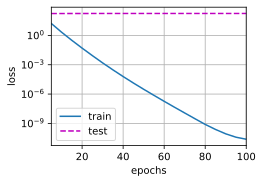

In [24]:
train_concise(0)

w的l2的范数 0.40678608417510986


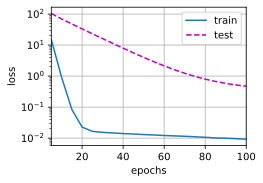

In [25]:
train_concise(3)

到目前为止，我们只接触到一个简单线性函数的概念。 此外，由什么构成一个简单的非线性函数可能是一个更复杂的问题。 例如，再生核希尔伯特空间（RKHS） 允许在非线性环境中应用为线性函数引入的工具。不幸的是，基于RKHS的算法往往难以应用到大型、高维的数据。 在这本书中，我们将默认使用简单的启发式方法，即在深层网络的所有层上应用权重衰减。

### 4.5.4. 小结
- 正则化是处理过拟合的常用方法：**在训练集的损失函数中加入惩罚项，以降低学习到的模型的复杂度。**
- 保持模型简单的一个特别的选择是使用$L_2$惩罚的权重衰减。这会导致学习算法更新步骤中的权重衰减。
- 权重衰减功能在深度学习框架的优化器中提供。
- 在同一训练代码实现中，不同的参数集可以有不同的更新行为。

